In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
# import sklearn.model_selection as ms
# from sklearn import metrics
# import xgboost as xgb
import matplotlib.pyplot as plt

import matplotlib
import time

In [2]:
# import matplotlib as mpl
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True
})


In [4]:
data_dir = "/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/2021/"
dir_plot = "/Users/hkim78/work/HotJupiter/plot/atmosphere-uncertainty/perturbed_data/2021/"


mean_temp = np.arange(400, 2100, 100)

legend_label = {"g":"G", 
                "ab": "Abundance", 
                "topo":"Topology", 
                "g_ab": "G + Abundance", 
                "g_topo": "G + Topology", 
                'topo_ab':"Topology + Abundance", 
                'g_topo_ab': "G + Topology + Abundance",
                'degree': r'$\langle k \rangle$', 
                'cc': r'$\langle C \rangle$',
                'spl': r'$\langle \ell \rangle$' , 
                'neighbor': r'$\langle k_{nn} \rangle$',
                'betw': r'$\langle g(v) \rangle$', 
                'edgebetw': r'$\langle g(e) \rangle$',
                'g_degree': "G + %s"%r'$\langle k \rangle$',
                'g_cc': "G + %s"%r'$\langle C \rangle$', 
                'g_spl': "G + %s"%r'$\langle \ell \rangle$', 
                'g_neighbor': "G + %s"%r'$\langle k_{nn} \rangle$', 
                'g_betw': "G + %s"%r'$\langle g(v) \rangle$', 
                'g_edgebetw': "G + %s"%r'$\langle g(e) \rangle$', 
                "CH4": r"$\mathrm{CH}_4$", 
                "CO": r"$\mathrm{CO}$", 
                "H2O": r"$\mathrm{H_2O}$", 
                "NH3": r"$\mathrm{NH}_3$",
                'g_CO': "G + %s"%r"$\mathrm{CO}$", 
                'g_CH4': "G + %s"%r"$\mathrm{CH}_4$",
                'g_NH3': "G + %s"%r"$\mathrm{NH}_3$",
                'g_H2O': "G + %s"%r"$\mathrm{H_2O}$", 
                'CO_NH3': "%s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'g_CO_NH3': "G + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'spl_neighbor_betw_edgebetw': "%s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'), 
                'g_spl_neighbor_betw_edgebetw': "G + %s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'),
                'top_predictor': "G + %s + %s + %s + %s + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$", 
                                                                    r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$')
                }

individual_group = ['g', 'topo', 'ab']
group_combination = ['topo_ab', 'g_topo', 'g_ab']
three_group = ['g_topo_ab']
simple_topo = ['degree', 'cc']
complex_topo = ['spl', 'neighbor']
betweenness = ['betw', 'edgebetw']
g_individual_topology = ['g_degree','g_cc', 'g_spl', 'g_neighbor', 'g_betw', 'g_edgebetw']
individual_abundance = ["CH4", "CO", "H2O", "NH3"]
g_individual_abundance = ['g_CO', 'g_CH4','g_NH3','g_H2O']
individual_topology = simple_topo + complex_topo + betweenness
individual_features = ['g'] + individual_abundance + individual_topology
best_predictors = ['CO_NH3', 'spl_neighbor_betw_edgebetw','g_CO_NH3', 'g_spl_neighbor_betw_edgebetw','top_predictor']

For each removed_species, three different categories in one plot 

/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/2021/perturbation_accuracy_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/2021/perturbation_accuracy_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/2021/perturbation_accuracy_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/2021/perturbation_accuracy_spl_neighbor_betw_edgebetw.json


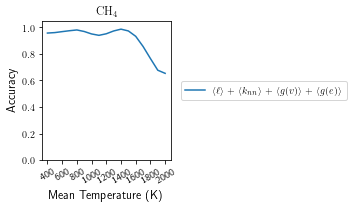

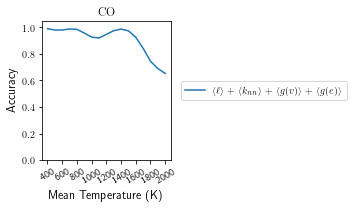

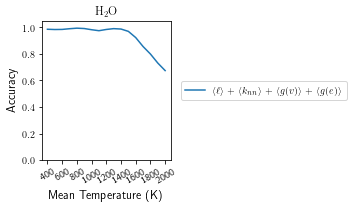

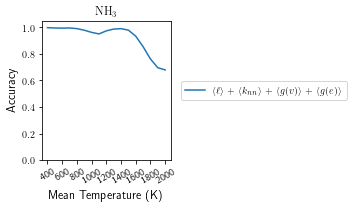

In [5]:
# g + individual_topology

for removed_species in ["CH4", "CO", "H2O", "NH3"]:
    #params = {'tex.usetex': True}
    plt.figure(figsize=(5.1, 3))
    #plt.rc(usetex = True)
    #plt.rcParams.update(params)

    for feature_group in ['spl_neighbor_betw_edgebetw']:#['g'] + ['topo'] + simple_topo + complex_topo + betweenness:
        input_path = data_dir + "perturbation_accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[removed_species], label = legend_label[feature_group])

    #if removed_species == "50":
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
    plt.ylim([0.0,1.05])

    plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    plt.yticks(fontsize= 10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(legend_label[removed_species], fontsize=12)
    plt.tight_layout()

    # plt.savefig(dir_plot + "perturbed_data_%s_removed_topo.png"%removed_species, dpi=200)
    # plt.savefig(dir_plot + "perturbed_data_%s_removed_topo.pdf"%removed_species)
    plt.show()

In [ ]:
for topology in simple_topo + complex_topo + betweenness:
    input_path = data_dir + "perturbation_accuracy_%s.json"%feature_group
